In [54]:
!pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
!pip install keras


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
#Import the necessary librabries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [61]:
#Import the dataset
df = pd.read_csv("C:/Users/hp/Desktop/MLs/DeployModelOvuLength/FedCycleData.csv")

In [62]:
#To view five rows out of the dataset
df.head()

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,TotalFertilityFormula,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,MensesScoreDaySeven,MensesScoreDayEight,MensesScoreDayNine,MensesScoreDayTen,MensesScoreDay11,MensesScoreDay12,MensesScoreDay13,MensesScoreDay14,MensesScoreDay15,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,PhasesBleeding,IntercourseDuringUnusBleed,Age,AgeM,Maristatus,MaristatusM,Yearsmarried,Wedding,Religion,ReligionM,Ethnicity,EthnicityM,Schoolyears,SchoolyearsM,OccupationM,IncomeM,Height,Weight,Reprocate,Numberpreg,Livingkids,Miscarriages,Abortions,Medvits,Medvitexplain,Gynosurgeries,LivingkidsM,Boys,Girls,MedvitsM,MedvitexplainM,Urosurgeries,Breastfeeding,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,5,0,2,9,15,5,4.49,3,3,2,1,1,,,,,,,,,,,10,9.04,5,1,0,,,36,39,0,0,10,,0,0,0,0,8,8,3,5,63,120,0,3,3,0,0,0,,,,,,0,,,0,9,,,2,7,7,1,1,0,21.25472411
1,nfp8122,2,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,2,1,1,,,,,,,,,,,10,,6,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,1,0,2,5,13,5,,3,3,2,1,1,,,,,,,,,,,10,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,3,2,1,,,,,,,,,,,12,,3,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,4,0,2,8,14,5,,3,3,2,2,1,,,,,,,,,,,11,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [64]:
# Data preprocessing
# Select relevant features and target variable (e.g., 'EstimatedDayofOvulation' LengthofLutealPhase,
# CycleNumber: To track the individual's cycle history.
# LengthofCycle: The length of the menstrual cycle.
# LengthofLutealPhase: The length of the luteal phase.
# TotalNumberofHighDays: The number of high fertility days.
# TotalNumberofPeakDays: The number of peak fertility days.
# UnusualBleeding: Information about unusual bleeding patterns.
# PhasesBleeding: Different phases of bleeding during the cycle.
# IntercourseInFertileWindow: Whether intercourse occurred during the fertile window.
# Age: Age of the individual.
# BMI: Body Mass Index.
# Method: Information about contraceptive methods used.)
ovulation_dataset = df[['CycleNumber', 'LengthofCycle', 'LengthofLutealPhase', 'TotalNumberofHighDays', 'TotalNumberofPeakDays', 'UnusualBleeding', 'PhasesBleeding', 'IntercourseInFertileWindow','Age','BMI','Method','EstimatedDayofOvulation']]

In [72]:
#To determine the shape of the dataset
ovulation_dataset.shape

(1624, 12)

In [77]:
ovulation_dataset.head(100)

,CycleNumber,LengthofCycle,LengthofLutealPhase,TotalNumberofHighDays,TotalNumberofPeakDays,UnusualBleeding,PhasesBleeding,IntercourseInFertileWindow,Age,BMI,Method,EstimatedDayofOvulation
0,1,29,12,5,2,0,1,1,36,21.25472411,9,17
1,2,27,12,2,2,0,1,1,NaN,NaN,NaN,15
2,3,29,14,1,2,0,1,1,NaN,NaN,NaN,15
3,4,27,12,2,2,0,1,0,NaN,NaN,NaN,15
4,5,28,12,4,2,0,1,1,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,29,15,5,1,0,1,0,23,22.46272189,9,14
96,2,29,13,3,1,0,1,0,NaN,NaN,NaN,16
97,3,26,13,2,1,0,1,0,NaN,NaN,NaN,13
98,4,25,13,4,1,0,1,0,NaN,NaN,NaN,12


In [76]:
ovulation_dataset.duplicated().sum()
ovulation_dataset.drop_duplicates(inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\1944901877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset.drop_duplicates(inplace=True)


In [70]:
ovulation_dataset.columns

Index(['CycleNumber', 'LengthofCycle', 'LengthofLutealPhase',
       'TotalNumberofHighDays', 'TotalNumberofPeakDays', 'UnusualBleeding',
       'PhasesBleeding', 'IntercourseInFertileWindow', 'Age', 'BMI', 'Method',
       'EstimatedDayofOvulation'],
      dtype='object')

In [91]:
# 1. Replacing missing values(Nan) in CycleNumber with the mode 
mode_CycleNumber = ovulation_dataset['CycleNumber'].mode()[0]
ovulation_dataset['CycleNumber'].fillna(mode_CycleNumber, inplace=True)

# 2. Replacing missing values(Nan) in LengthofCycle with the mode 
mode_LengthofCycle = ovulation_dataset['LengthofCycle'].mode()[0]
ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)

# 3. Replacing missing values(Nan) in LengthofLutealPhase with the mode 
mode_LengthofLutealPhase = ovulation_dataset['LengthofLutealPhase'].mode()[0]
ovulation_dataset['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)

# 4. Replacing missing values(Nan) in TotalNumberofHighDays with the mode 
mode_TotalNumberofHighDays = ovulation_dataset['TotalNumberofHighDays'].mode()[0]
ovulation_dataset['TotalNumberofHighDays'].fillna(mode_TotalNumberofHighDays, inplace=True)

# 5. Replacing missing values(Nan) in TotalNumberofPeakDays with the mode 
mode_TotalNumberofPeakDays = ovulation_dataset['TotalNumberofPeakDays'].mode()[0]
ovulation_dataset['TotalNumberofPeakDays'].fillna(mode_TotalNumberofPeakDays, inplace=True)

# 6. Replacing missing values(Nan) in UnusualBleedingwith the mode 
mode_UnusualBleeding = ovulation_dataset['UnusualBleeding'].mode()[0]
ovulation_dataset['UnusualBleeding'].fillna(mode_UnusualBleeding, inplace=True)

# 7. Replacing missing values(Nan) in PhasesBleeding  with the mode 
mode_PhasesBleeding  = ovulation_dataset['PhasesBleeding'].mode()[0]
ovulation_dataset['PhasesBleeding'].fillna(mode_PhasesBleeding  , inplace=True)

# 8. Replacing missing values(Nan) in PhasesBleeding  with the mode 
mode_IntercourseInFertileWindow  = ovulation_dataset['IntercourseInFertileWindow'].mode()[0]
ovulation_dataset['IntercourseInFertileWindow'].fillna(mode_IntercourseInFertileWindow, inplace=True)

# 9. Replacing missing values(Nan) in Age with the mode 
mode_Age    = ovulation_dataset['Age'].mode()[0]
ovulation_dataset['Age'].fillna(mode_Age , inplace=True)
              
# 10. Replacing missing values(Nan) in BMI   with the mode 
mode_BMI = ovulation_dataset['BMI'].mode()[0]
ovulation_dataset['BMI'].fillna(mode_BMI, inplace=True)   
                        
# 11. Replacing missing values(Nan) in Method  with the mode 
mode_Method = ovulation_dataset['Method'].mode()[0]
ovulation_dataset['Method'].fillna(mode_Method  , inplace=True)                       
  
# 12. Replacing missing values(Nan) in EstimatedDayofOvulation with the mode 
mode_EstimatedDayofOvulation = df['EstimatedDayofOvulation'].mode()[0]
ovulation_dataset['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4152958207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['CycleNumber'].fillna(mode_CycleNumber, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4152958207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofCycle'].fillna(mode_LengthofCycle, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4152958207.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [82]:
# Clean the 'EstimatedDayofOvulation' column by replacing empty strings with NaN and converting to float
ovulation_dataset['EstimatedDayofOvulation'] = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\3657882898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['EstimatedDayofOvulation'] = pd.to_numeric(df['EstimatedDayofOvulation'], errors='coerce')


In [83]:
# Clean the 'LengthofLutealPhase  ' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofLutealPhase'] = pd.to_numeric(df['LengthofLutealPhase'], errors='coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\565036484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofLutealPhase'] = pd.to_numeric(df['LengthofLutealPhase'], errors='coerce')


In [84]:
# Clean the 'LengthofCycle' column by replacing empty strings with NaN and converting to float
ovulation_dataset['LengthofCycle'] = pd.to_numeric(df['LengthofCycle'], errors='coerce')

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\2775333240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofCycle'] = pd.to_numeric(df['LengthofCycle'], errors='coerce')


In [92]:
ovulation_dataset.isnull().sum()

CycleNumber                   0
LengthofCycle                 0
LengthofLutealPhase           0
TotalNumberofHighDays         0
TotalNumberofPeakDays         0
UnusualBleeding               0
PhasesBleeding                0
IntercourseInFertileWindow    0
Age                           0
BMI                           0
Method                        0
EstimatedDayofOvulation       0
dtype: int64

In [88]:
#To determine the datatype and the data columns of the dataset
ovulation_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1624 entries, 0 to 1663
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CycleNumber                 1624 non-null   int64  
 1   LengthofCycle               1624 non-null   int64  
 2   LengthofLutealPhase         1624 non-null   float64
 3   TotalNumberofHighDays       1624 non-null   object 
 4   TotalNumberofPeakDays       1624 non-null   object 
 5   UnusualBleeding             1624 non-null   object 
 6   PhasesBleeding              1624 non-null   object 
 7   IntercourseInFertileWindow  1624 non-null   int64  
 8   Age                         1624 non-null   object 
 9   BMI                         1624 non-null   object 
 10  Method                      1624 non-null   object 
 11  EstimatedDayofOvulation     1478 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 164.9+ KB


In [93]:
ovulation_dataset.head(5)

,CycleNumber,LengthofCycle,LengthofLutealPhase,TotalNumberofHighDays,TotalNumberofPeakDays,UnusualBleeding,PhasesBleeding,IntercourseInFertileWindow,Age,BMI,Method,EstimatedDayofOvulation
0,1,29,12.0,5,2,0,1,1,36,21.25472411,9,17.0
1,2,27,12.0,2,2,0,1,1,23,29.17724609,9,15.0
2,3,29,14.0,1,2,0,1,1,23,29.17724609,9,15.0
3,4,27,12.0,2,2,0,1,0,23,29.17724609,9,15.0
4,5,28,12.0,4,2,0,1,1,23,29.17724609,9,16.0


In [94]:
# Convert the column to int
ovulation_dataset['CycleNumber'] = ovulation_dataset['CycleNumber'].astype(int)
ovulation_dataset['LengthofCycle'] = ovulation_dataset['LengthofCycle'].astype(int)
ovulation_dataset['LengthofLutealPhase'] = ovulation_dataset['LengthofLutealPhase'].astype(int)
ovulation_dataset['TotalNumberofHighDays'] = ovulation_dataset['TotalNumberofHighDays'].astype(int)
ovulation_dataset['TotalNumberofPeakDays'] = ovulation_dataset['TotalNumberofPeakDays'].astype(int)
ovulation_dataset['UnusualBleeding'] = ovulation_dataset['UnusualBleeding'].astype(int)
ovulation_dataset['PhasesBleeding'] = ovulation_dataset['PhasesBleeding'].astype(int)
ovulation_dataset['IntercourseInFertileWindow'] = ovulation_dataset['IntercourseInFertileWindow'].astype(int)
ovulation_dataset['Age'] = ovulation_dataset['Age'].astype(int)
ovulation_dataset['BMI'] = ovulation_dataset['BMI'].astype(int)
ovulation_dataset['Method'] = ovulation_dataset['Method'].astype(int)
ovulation_dataset['EstimatedDayofOvulation'] = ovulation_dataset['EstimatedDayofOvulation'].astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4092574544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['CycleNumber'] = ovulation_dataset['CycleNumber'].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4092574544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ovulation_dataset['LengthofCycle'] = ovulation_dataset['LengthofCycle'].astype(int)
C:\Users\hp\AppData\Local\Temp\ipykernel_10380\4092574544.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

ValueError: invalid literal for int() with base 10: '21.25472411'

In [95]:
ovulation_dataset.head(5)

,CycleNumber,LengthofCycle,LengthofLutealPhase,TotalNumberofHighDays,TotalNumberofPeakDays,UnusualBleeding,PhasesBleeding,IntercourseInFertileWindow,Age,BMI,Method,EstimatedDayofOvulation
0,1,29,12,5,2,0,1,1,36,21.25472411,9,17.0
1,2,27,12,2,2,0,1,1,23,29.17724609,9,15.0
2,3,29,14,1,2,0,1,1,23,29.17724609,9,15.0
3,4,27,12,2,2,0,1,0,23,29.17724609,9,15.0
4,5,28,12,4,2,0,1,1,23,29.17724609,9,16.0


In [96]:
#Splitting the dataset
'''After preprocessing the dataset, it was then splitted into features and target set. 
X represent the features dataset, while Y represent the target dataset. 
The drop() function used here is used to drop the 'EstimatedDayofOvulation' from the dataset so as to separate it from the features dataset.
It is therefore shown below:'''
X = ovulation_dataset.drop('EstimatedDayofOvulation', axis= 1)
y = ovulation_dataset['EstimatedDayofOvulation']

In [97]:
#To view the values of X dataset
#The X represent the features dataset. It is shown by just typing X as shown in the figure below:
X

,CycleNumber,LengthofCycle,LengthofLutealPhase,TotalNumberofHighDays,TotalNumberofPeakDays,UnusualBleeding,PhasesBleeding,IntercourseInFertileWindow,Age,BMI,Method
0,1,29,12,5,2,0,1,1,36,21.25472411,9
1,2,27,12,2,2,0,1,1,23,29.17724609,9
2,3,29,14,1,2,0,1,1,23,29.17724609,9
3,4,27,12,2,2,0,1,0,23,29.17724609,9
4,5,28,12,4,2,0,1,1,23,29.17724609,9
...,...,...,...,...,...,...,...,...,...,...,...
1659,6,32,13,3,3,0,1,1,23,29.17724609,9
1660,7,29,10,5,3,1,1,0,23,29.17724609,9
1661,8,28,11,3,4,0,1,1,23,29.17724609,9
1662,9,28,12,4,3,0,1,0,23,29.17724609,9


In [99]:
y

0       17.0
1       15.0
2       15.0
3       15.0
4       16.0
        ... 
1659    19.0
1660    19.0
1661    17.0
1662    16.0
1663    27.0
Name: EstimatedDayofOvulation, Length: 1624, dtype: object

In [100]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model. 
The 'y_train' represent the 85% of the target dataset that was used to train the model. 
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [101]:
#To develop the model the following was carried out:
from sklearn.tree import DecisionTreeRegressor
#Create an instance of the Decision Tree model
decision_tree = DecisionTreeRegressor()

In [102]:
#Train the model
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [103]:
from sklearn.metrics import r2_score

In [105]:
# Now, you can proceed with making predictions
y_pred_DT = decision_tree.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_DT )
print("Mean Squared Error for Decision Tree Algorithm:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_DT, squared=False)
print("Root Mean Squared Error for Decision Tree Algorithm:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_DT)
print("Mean Absolute Error for Decision Tree:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_DT)
print("R-squared for Decision Tree Algorithm:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_DT)
print("Mean Absolute Percentage Error for Decision Tree Algorithm:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_DT)
print("Explained Variance Score for Decision Tree Algorithm:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_DT)
print("Median Absolute Error for Decision Tree Algorithm:", medae)

Mean Squared Error for Decision Tree Algorithm: 1.6721311475409837
Root Mean Squared Error for Decision Tree Algorithm: 1.2931091011747553
Mean Absolute Error for Decision Tree: 0.3442622950819672
R-squared for Decision Tree Algorithm: 0.8759031278514906
Mean Absolute Percentage Error for Decision Tree Algorithm: 0.02427595182493679
Explained Variance Score for Decision Tree Algorithm: 0.876307011114269
Median Absolute Error for Decision Tree Algorithm: 0.0


In [57]:
#Picke the model
import pickle 
import joblib
pd.to_pickle(decision_tree,  "C:\\Users\\hp\\Desktop\\DecisonTreeModel.pickle")
filename= 'saved_model.sav'
saved_model= joblib.dump(decision_tree, filename)

In [47]:
#Unpickle model
pd.to_pickle(decision_tree, "C:\\Users\\hp\\Desktop\\DecisonTreeModel.pickle")

In [128]:
#Take input from users 
									
CycleNumber = int(input("Enter Estimated ovulation day: "))
LengthofLutealPhase = int(input("Enter your length of luteal phase: "))
LengthofCycle = int(input("Enter Estimated ovulation day: "))
TotalNumberofHighDays = int(input("Enter your length of luteal phase: "))
TotalNumberofPeakDays = int(input("Enter Estimated ovulation day: "))
UnusualBleeding = int(input("Enter your length of luteal phase: "))
PhasesBleeding= int(input("Enter Estimated ovulation day: "))
IntercourseInFertileWindow = int(input("Enter your length of luteal phase: "))
Age = int(input("Enter Estimated ovulation day: "))
BMI = int(input("Enter your length of luteal phase: "))
Method = int(input("Enter Estimated ovulation day: "))

result = decision_tree.predict([[EstimatedOvulationDay, LengthofLutealPhase ]])
print("Your Ovulation day is:", result)

Enter Estimated ovulation day:  21
Enter your length of luteal phase:  14


Your menstrual cycle length is: [35.]


C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [107]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model. 
The 'y_train' represent the 85% of the target dataset that was used to train the model. 
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [111]:
from sklearn.ensemble import RandomForestClassifier 

# Create an instance of the Random Forest 
#rf = RandomForestClassifier()
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [112]:
# Train the model
rf.fit(X_train, y_train)

ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [148]:
y_pred_RF = rf.predict(X_test)

In [157]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_RF)
print("Mean Squared Error for Random Forest Algorithm:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_RF, squared=False)
print("Root Mean Squared Error for Random Forest Algorithm:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_RF)
print("Mean Absolute Error for Random Forest Algorithm:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_RF)
print("R-squared for Random Forest Algorithm:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_RF)
print("Mean Absolute Percentage Error for Random Forest Algorithm:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_RF)
print("Explained Variance Score for Random Forest Algorithm:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_RF)
print("Median Absolute Error for Random Forest Algorithm:", medae)

Mean Squared Error for Random Forest Algorithm: 3.008
Root Mean Squared Error for Random Forest Algorithm: 1.734358671094304
Mean Absolute Error for Random Forest Algorithm: 0.528
R-squared for Random Forest Algorithm: 0.7872638968727792
Mean Absolute Percentage Error for Random Forest Algorithm: 0.01719472155961226
Explained Variance Score for Random Forest Algorithm: 0.789259995202122
Median Absolute Error for Random Forest Algorithm: 0.0


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model. 
The 'y_train' represent the 85% of the target dataset that was used to train the model. 
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [155]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [156]:
# Make predictions and evaluate the model's performance
y_pred_LR = lr_model.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LR) 
print("Mean Squared Error for Linear Regression:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LR, squared=False)
print("Root Mean Squared Error for Linear Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_LR )
print("Mean Absolute Error for Linear Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_LR )
print("R-squared for Linear Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LR )
print("Mean Absolute Percentage Error for Linear Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_LR)
print("Explained Variance Score for Linear Regression:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_LR)
print("Median Absolute Error for Linear Regression:", medae)


Mean Squared Error for Linear Regression: 2.294108764277203
Root Mean Squared Error for Linear Regression: 1.5146315605708218
Mean Absolute Error for Linear Regression: 0.6469544781787253
R-squared for Linear Regression: 0.8377527398064043
Mean Absolute Percentage Error for Linear Regression: 0.02288643767416694
Explained Variance Score for Linear Regression: 0.8397249986717931
Median Absolute Error for Linear Regression: 0.36568428315927193


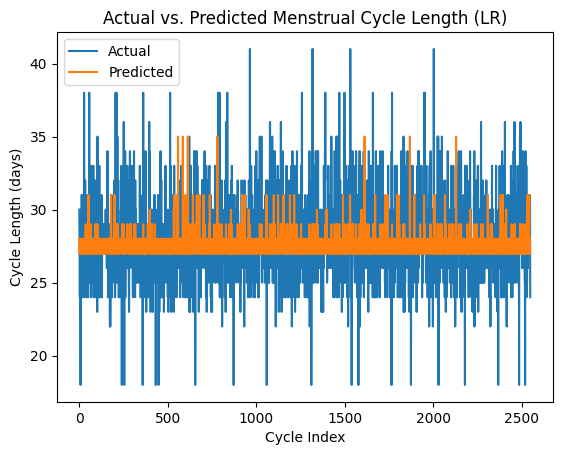

In [42]:
x =  range(len(y_train))

plt.plot(x, y_train, label='Actual')
plt.plot(x, y_train_predlr, label='Predicted')

plt.xlabel('Cycle Index')
plt.ylabel('Cycle Length (days)')
plt.title('Actual vs. Predicted Menstrual Cycle Length (LR)')

plt.legend()
plt.show()

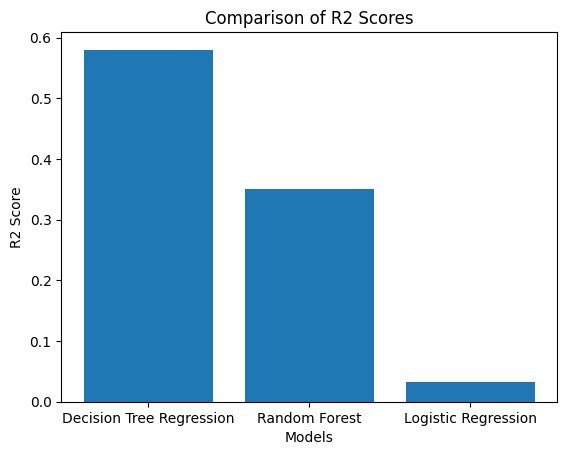

In [43]:
import matplotlib.pyplot as plt

models = ['Decision Tree Regression', 'Random Forest', 'Logistic Regression']
r2_scores = [0.58, 0.35, 0.033]  # Example R2 scores

plt.bar(models, r2_scores)

plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')

plt.show()

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
#Split the dataset into training and testing set
'''The 'X_train' represent the 85% of the training dataset. The 'X_test' represent the 15% for testing the model. 
The 'y_train' represent the 85% of the target dataset that was used to train the model. 
The 'y_test' represent the 15% of the target dataset that was used to test the model.'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [182]:
# This section for Huber Regressor
huber_reg = HuberRegressor(epsilon=1.35)  # You can adjust the epsilon parameter
huber_reg.fit(X_train, y_train)

HuberRegressor()

In [183]:
# Make predictions on the test set
y_pred_HuberReg = huber_reg.predict(X_test)

In [184]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_HuberReg) 
print("Mean Squared Error for Huber Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_HuberReg, squared=False)
print("Root Mean Squared Error for Huber Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_HuberReg )
print("Mean Absolute Error for Huber Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_HuberReg)
print("R-squared for Huber Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_HuberReg)
print("Mean Absolute Percentage Error for Huber Regressor:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_HuberReg)
print("Explained Variance Score for Huber Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_HuberReg)
print("Median Absolute Error for Huber Regressor:", medae)

Mean Squared Error for Huber Regressor: 2.3239999991083664
Root Mean Squared Error for Huber Regressor: 1.5244671197203192
Mean Absolute Error for Huber Regressor: 0.36400001573554447
R-squared for Huber Regressor: 0.8356387288969487
Mean Absolute Percentage Error for Huber Regressor: 0.0125682792420833
Explained Variance Score for Huber Regressor: 0.836590383206489
Median Absolute Error for Huber Regressor: 1.7545112029893062e-08


In [ ]:
# For least Angle Regresion

In [185]:
from sklearn.linear_model import Lars

In [186]:
lars = Lars()
lars.fit(X_train, y_train)

Lars()

In [187]:
# Make predictions on the test set.
y_pred_LARS = lars.predict(X_test)

In [188]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LARS) 
print("Mean Squared Error for Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LARS, squared=False)
print("Root Mean Squared Error for Least Angle Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_LARS)
print("Mean Absolute Error for Least Angel Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_LARS)
print("R-squared for Huber Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LARS)
print("Mean Absolute Percentage Error for Least Angel Regressor:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_LARS)
print("Explained Variance Score for Least Angel Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_LARS)
print("Median Absolute Error for Least Angel Regressor:", medae)

Mean Squared Error for Least Angle Regressor: 2.294108764277203
Root Mean Squared Error for Least Angle Regressor: 1.5146315605708218
Mean Absolute Error for Least Angel Regressor: 0.6469544781787256
R-squared for Huber Regressor: 0.8377527398064043
Mean Absolute Percentage Error for Least Angel Regressor: 0.02288643767416696
Explained Variance Score for Least Angel Regressor: 0.8397249986717932
Median Absolute Error for Least Angel Regressor: 0.36568428315927193


In [189]:
# For least Angle Regresion

In [190]:
from sklearn.linear_model import Lasso

In [191]:
# Initialize the Lasso regression model.
lasso = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed.

In [192]:
# Train the Lasso model on the training data.
lasso.fit(X_train, y_train)

Lasso()

In [193]:
# Make predictions on the test set.
y_pred_lasso = lasso.predict(X_test)

In [194]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso) 
print("Mean Squared Error for Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LARS, squared=False)
print("Root Mean Squared Error for Lasso Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error for Lasso Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_lasso)
print("R-squared for Lasso Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso)
print("Mean Absolute Percentage Error for Lasso Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_lasso)
print("Explained Variance Score for Lasso Regresion:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_lasso)
print("Median Absolute Error for Lasso Regression:", medae)

Mean Squared Error for Least Angle Regressor: 2.639120238170266
Root Mean Squared Error for Lasso Regression: 1.5146315605708218
Mean Absolute Error for Lasso Regression: 0.9345418157385402
R-squared for Lasso Regression: 0.8133523420370595
Mean Absolute Percentage Error for Lasso Regression: 0.032339144072889736
Explained Variance Score for Lasso Regresion: 0.8145772491957535
Median Absolute Error for Lasso Regression: 0.6179639164098845


In [ ]:
# For least Angle Regresion

In [195]:
from sklearn.linear_model import LassoLars

In [196]:
# Initialize the LassoLars regression model.
lasso_lars = LassoLars(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed.

In [197]:
# Train the LassoLars model on the training data.
lasso_lars.fit(X_train, y_train)

LassoLars()

In [198]:
# Make predictions on the test set.
y_pred_lasso_lars = lasso_lars.predict(X_test)

In [200]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso_lars) 
print("Mean Squared Error for Lasso Least Angle Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_lasso_lars, squared=False)
print("Root Mean Squared Error for Lasso Least Angle Regression:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso_lars)
print("Mean Absolute Error for Lasso Least Angel Regression:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_lasso_lars)
print("R-squared for Lasso Least Angel Regression:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_lasso_lars)
print("Mean Absolute Percentage Error for Lasso Least Angel Regression:", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_lasso_lars)
print("Explained Variance Score for Lasso Least Regresion:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_lasso_lars)
print("Median Absolute Error for Lasso Least Angle Regression:", medae)

Mean Squared Error for Lasso Least Angle Regressor: 2.63911656824673
Root Mean Squared Error for Lasso Least Angle Regression: 1.62453580085104
Mean Absolute Error for Lasso Least Angel Regression: 0.9345396967691519
R-squared for Lasso Least Angel Regression: 0.8133526015866711
Mean Absolute Percentage Error for Lasso Least Angel Regression: 0.03233907309692495
Explained Variance Score for Lasso Least Regresion: 0.8145775106114873
Median Absolute Error for Lasso Least Angle Regression: 0.6179607175297441


In [201]:
# Extract the selected features and their coefficients.
selected_features_lasso_lars = X.columns[lasso_lars.coef_ != 0]
coefficients_lasso_lars = lasso_lars.coef_[lasso_lars.coef_ != 0]
print("Selected Features (LassoLars):", selected_features_lasso_lars)
print("Coefficients (LassoLars):", coefficients_lasso_lars)

Selected Features (LassoLars): Index(['EstimatedDayofOvulation', 'LengthofLutealPhase'], dtype='object')
Coefficients (LassoLars): [0.8066329  0.72212832]


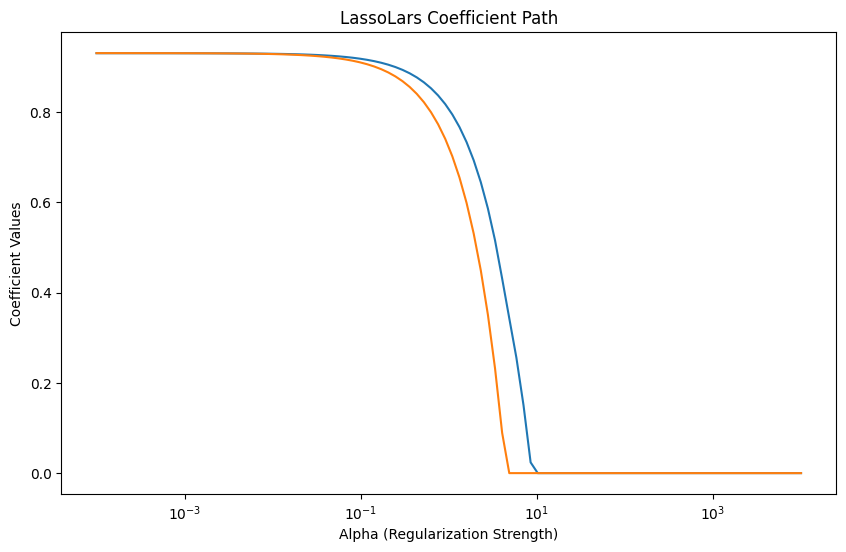

In [202]:
# Vary Alpha and Path Visualization
import numpy as np
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 4, 100)  # Vary alpha values over a range
coefs = []

for alpha in alphas:
    lasso_lars = LassoLars(alpha=alpha)
    lasso_lars.fit(X_train, y_train)
    coefs.append(lasso_lars.coef_)

# Plot the path of coefficients vs. alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Values')
plt.title('LassoLars Coefficient Path')
plt.axis('tight')
plt.show()

In [203]:
# Dummy Regression

In [204]:
from sklearn.dummy import DummyRegressor

In [205]:
# Initialize the Dummy Regressor with the "mean" strategy.
dummy_regressor = DummyRegressor(strategy="mean")

In [206]:
# Train the Dummy Regressor (no actual training is needed for this strategy).
dummy_regressor.fit(X_train, y_train)

DummyRegressor()

In [207]:
# Make predictions using the Dummy Regressor.
y_pred_dummy = dummy_regressor.predict(X_test)

In [214]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_dummy) 
print("Mean Squared Error for Dummy Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_dummy, squared=False)
print("Root Mean Squared Error for Dummy Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_dummy)
print("Mean Absolute Error for Dummy Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_dummy)
print("R-squared for Dummy Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_dummy)
print("Mean Absolute Percentage Error for Dummy Regressor", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_dummy)
print("Explained Variance Score for Dummy Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_dummy)
print("Median Absolute Error for Dummy Regressor:", medae)

Mean Squared Error for Dummy Regressor: 14.139588079600038
Root Mean Squared Error for Dummy Regressor: 3.7602643629936496
Mean Absolute Error for Dummy Regressor: 2.817227722772277
R-squared for Dummy Regressor: -2.8852334255091705e-07
Mean Absolute Percentage Error for Dummy Regressor 0.0947626266655161
Explained Variance Score for Dummy Regressor: 0.0
Median Absolute Error for Dummy Regressor: 2.301980198019802


In [209]:
# Ridge Regression

In [210]:
from sklearn.linear_model import Ridge

In [211]:
# Initialize the Ridge regression model with a specific alpha value.
ridge = Ridge(alpha=1.0)  # You can adjust the alpha value as needed.

In [212]:
# Train the Ridge model on the training data.
ridge.fit(X_train, y_train)

Ridge()

In [213]:
# Make predictions using the Ridge model.
y_pred_ridge = ridge.predict(X_test)

In [215]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_ridge) 
print("Mean Squared Error for ridge Regressor:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
print("Root Mean Squared Error for Ridge Regressor:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error for Ridge Regressor:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared for Ridge Regressor:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print("Mean Absolute Percentage Error for Ridge Regressor", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_ridge)
print("Explained Variance Score for Ridge Regressor:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_ridge)
print("Median Absolute Error for Ridge Regressor:", medae)

Mean Squared Error for ridge Regressor: 2.294093600504422
Root Mean Squared Error for Ridge Regressor: 1.5146265547997044
Mean Absolute Error for Ridge Regressor: 0.6470564484628811
R-squared for Ridge Regressor: 0.8377538122405566
Mean Absolute Percentage Error for Ridge Regressor 0.02288993783118628
Explained Variance Score for Ridge Regressor: 0.8397255211274202
Median Absolute Error for Ridge Regressor: 0.36577863991946913


In [216]:
from sklearn.neighbors import KNeighborsRegressor

In [217]:
# Initialize the K Neighbors Regressor with a specific number of neighbors (k).
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust 'n_neighbors' as needed.

In [218]:
k_neighbors_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [219]:
# Make predictions using the Ridge model.
y_pred_k_neighbors_regressor = k_neighbors_regressor.predict(X_test)

In [220]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_k_neighbors_regressor) 
print("Mean Squared Error for KNN:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_k_neighbors_regressor, squared=False)
print("Root Mean Squared Error for KNN:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_k_neighbors_regressor)
print("Mean Absolute Error for KNN:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_k_neighbors_regressor)
print("R-squared for KNN:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_k_neighbors_regressor)
print("Mean Absolute Percentage Error for KNN", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_k_neighbors_regressor)
print("Explained Variance Score for KNN:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_k_neighbors_regressor)
print("Median Absolute Error for KNN:", medae)

Mean Squared Error for KNN: 3.988640000000001
Root Mean Squared Error for KNN: 1.9971579807316198
Mean Absolute Error for KNN: 0.6568000000000002
R-squared for KNN: 0.717909664103272
Mean Absolute Percentage Error for KNN 0.021361321891354302
Explained Variance Score for KNN: 0.7299145434547437
Median Absolute Error for KNN: 0.0


In [221]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [222]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Example values for 'n_neighbors'
    # You can include other hyperparameters and their ranges as needed.
}

In [223]:
k_neighbors_regressor = KNeighborsRegressor()
grid_search = GridSearchCV(k_neighbors_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

In [224]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_mean_squared_error')

In [227]:
# access the best hyperparameters and the best model.
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [228]:
# Evaluate the best model
y_pred_best_KNN = best_estimator.predict(X_test)

In [229]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_best_KNN) 
print("Mean Squared Error for y_pred_best_KNN:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_best_KNN, squared=False)
print("Root Mean Squared Error for y_pred_best_KNN:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_best_KNN)
print("Mean Absolute Error for y_pred_best_KNN:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_best_KNN)
print("R-squared for y_pred_best_KNN:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_best_KNN)
print("Mean Absolute Percentage Error for y_pred_best_KNN", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_best_KNN)
print("Explained Variance Score for y_pred_best_KNN:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_best_KNN)
print("Median Absolute Error for y_pred_best_KNN:", medae)

Mean Squared Error for y_pred_best_KNN: 3.210765432098765
Root Mean Squared Error for y_pred_best_KNN: 1.791860885252749
Mean Absolute Error for y_pred_best_KNN: 0.6026666666666667
R-squared for y_pred_best_KNN: 0.7729236282977798
Mean Absolute Percentage Error for y_pred_best_KNN 0.019703516238530644
Explained Variance Score for y_pred_best_KNN: 0.7777866068569199
Median Absolute Error for y_pred_best_KNN: 0.0


In [230]:
from sklearn.linear_model import ElasticNet

In [231]:
# Initialize the Elastic Net model with specific alpha and l1_ratio values.
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust 'alpha' and 'l1_ratio' as needed.

In [232]:
# Train the Elastic Net model on the training data.
elastic_net.fit(X_train, y_train)

ElasticNet()

In [233]:
# Make predictions using the Elastic Net model.
y_pred_elastic_net = elastic_net.predict(X_test)

In [235]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_elastic_net) 
print("Mean Squared Error for Elastic Net:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_elastic_net, squared=False)
print("Root Mean Squared Error for Elastic Net:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_elastic_net)
print("Mean Absolute Error for Elastic Net:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_elastic_net)
print("R-squared for Elastic Net:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_elastic_net)
print("Mean Absolute Percentage Error for Elastic Net", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_elastic_net)
print("Explained Variance Score for Elastic Net:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_elastic_net)
print("Median Absolute Error for Elastic Net", medae)

Mean Squared Error for Elastic Net: 2.563735265604195
Root Mean Squared Error for Elastic Net: 1.6011668450240266
Mean Absolute Error for Elastic Net: 0.8984437391630721
R-squared for Elastic Net: 0.818683826511148
Mean Absolute Percentage Error for Elastic Net 0.03115830932611471
Explained Variance Score for Elastic Net: 0.8199882890156751
Median Absolute Error for Elastic Net 0.5653998842733898


In [236]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [239]:
# Initialize the Orthogonal Matching Pursuit model with the desired number of features.
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=2)  # Adjust the number of features as needed.

In [240]:
# Train the OMP model on the training data.
omp.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=2)

In [241]:
# Make predictions using the Orthogonal Matching Pursuit model.
y_pred_omp = omp.predict(X_test)

In [242]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_omp) 
print("Mean Squared Error for Orthogonal Matching Pursuit:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_omp, squared=False)
print("Root Mean Squared Error for Orthogonal Matching Pursuit:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_omp)
print("Mean Absolute Error for Othogonal Matching Pursuit:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_omp)
print("R-squared for Othogonal Matching Pursuit:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_omp)
print("Mean Absolute Percentage Error for Othogonal Matching Pursuit", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_omp)
print("Explained Variance Score for orthogonal Matchiing Pursuit:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_omp)
print("Median Absolute Error for Orthogonal Matching Pursuit", medae)

Mean Squared Error for Orthogonal Matching Pursuit: 2.294108764277203
Root Mean Squared Error for Orthogonal Matching Pursuit: 1.5146315605708218
Mean Absolute Error for Othogonal Matching Pursuit: 0.6469544781787259
R-squared for Othogonal Matching Pursuit: 0.8377527398064043
Mean Absolute Percentage Error for Othogonal Matching Pursuit 0.02288643767416697
Explained Variance Score for orthogonal Matchiing Pursuit: 0.8397249986717932
Median Absolute Error for Orthogonal Matching Pursuit 0.36568428315927193


In [246]:
# LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework that is designed for speed and efficiency. 
# It's a powerful tool for regression tasks, including modeling aspects of the menstrual cycle. To use LightGBM for this
# analysis, you'll need to follow these steps:

In [245]:
# 1. Import LightGBM:

# First, you need to import the LightGBM library. Make sure you have LightGBM installed, and if not, you can install it using pip:

In [247]:
!pip install LightGBM

                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB ? eta -:--:--
                                              0.0/1.3 MB 435.7 kB/s eta 0:00:03
                                              0.0/1.3 MB 435.7 kB/s eta 0:00:03
     -                                        0.0/1.3 MB 196.9 kB/s eta 0:00:07
     --                                       0.1/1.3 MB 350.1 kB/s eta 0:00:04
     --                                       0.1/1.3 MB 350.1 kB/s eta 0:00:04
     ---                                      0.1/1.3 MB 328.2 kB/s eta 0:00:04
     ---                                      0.1/1.3 MB 300.4 kB/s eta 0:00:04
     ----                                     0.2/1.3 MB 366.6 kB/s eta 0:00:04
     ----                                     0.2/1.3 MB 366.6 kB/s eta 0:00:04
     -----                                    0.2/1.3 MB 338.5 kB/s eta 0:00:04
     -----                                    0.2/1.3 MB 3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [248]:
import lightgbm as lgb

In [250]:
# Define Hyperparameters:

# You need to specify the hyperparameters for your LightGBM model. Hyperparameter tuning can be an iterative process, so you 
# might start with some reasonable values and then fine-tune as needed. Here's an example set of hyperparameters:

In [249]:
params = {
    'objective': 'regression',  # Set the objective for regression
    'boosting_type': 'gbdt',   # Gradient Boosting Decision Tree
    'metric': 'mse',           # Mean Squared Error
    'num_leaves': 31,          # Number of leaves in each tree
    'learning_rate': 0.05,     # Learning rate
    'feature_fraction': 0.9,   # Feature fraction for building trees
    'bagging_fraction': 0.8,   # Bagging fraction for sampling data
    'bagging_freq': 5,         # Frequency for bagging
    'verbose': 0               # Control the level of verbosity (0 means no messages)
}

In [252]:
# Create LightGBM datasets
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [253]:
# Train the model without early stopping
num_boost_round = 1000  # Set the number of boosting rounds
model = lgb.train(params, lgb_train, num_boost_round=num_boost_round)

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [255]:
# Make predictions on the test set
y_pred_LightGBM = model.predict(X_test)

In [257]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_LightGBM) 
print("Mean Squared Error for LightGBM:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_LightGBM, squared=False)
print("Root Mean Squared Error for LightGBM:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_LightGBM)
print("Mean Absolute Error for y_pred_LightGBM:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_LightGBM)
print("R-squared for LightGBM:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LightGBM)
print("Mean Absolute Percentage Error for LightGBM", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_LightGBM)
print("Explained Variance Score for LightGBM:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_LightGBM)
print("Median Absolute Error for LightGBM", medae)

Mean Squared Error for LightGBM: 3.927548055002587
Root Mean Squared Error for LightGBM: 1.9818042423515465
Mean Absolute Error for y_pred_LightGBM: 0.652896612152291
R-squared for LightGBM: 0.7222302965205634
Mean Absolute Percentage Error for LightGBM 0.021990485436275783
Explained Variance Score for LightGBM: 0.7239652896162208
Median Absolute Error for LightGBM 0.012535964766136942


In [258]:
# Bayesian Ridge Regression is a linear regression technique that applies a Bayesian approach to estimate the model parameters.
# It's particularly useful when you want to account for uncertainty in the model and its parameters. Here's how you can 
# build a Bayesian Ridge Regression model for your analysis of the menstrual cycle:

In [259]:
# Import BayesianRidge from scikit-learn:

# First, import the Bayesian Ridge regression model from scikit-learn
from sklearn.linear_model import BayesianRidge

In [260]:
# Initialize the Bayesian Ridge model.
bayesian_ridge = BayesianRidge()

In [261]:
# Train the Bayesian Ridge model on the training data.
bayesian_ridge.fit(X_train, y_train)

BayesianRidge()

In [262]:
# Make predictions using the Bayesian Ridge model.
y_pred_bayesian_ridge = bayesian_ridge.predict(X_test)

In [263]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_bayesian_ridge) 
print("Mean Squared Error for Bayesian Ridge:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_bayesian_ridge, squared=False)
print("Root Mean Squared Error for Bayesian Ridge:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_bayesian_ridge)
print("Mean Absolute Error for Bayesian Ridge:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_bayesian_ridge)
print("R-squared for Bayesian Ridge:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_LightGBM)
print("Mean Absolute Percentage Error for Bayesian Ridge", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_bayesian_ridge)
print("Explained Variance Score for Bayesian Ridge:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_bayesian_ridge)
print("Median Absolute Error for Bayesian Ridge", medae)

Mean Squared Error for Bayesian Ridge: 2.2940470115940124
Root Mean Squared Error for Bayesian Ridge: 1.5146111750525322
Mean Absolute Error for Bayesian Ridge: 0.6473845598159994
R-squared for Bayesian Ridge: 0.8377571071684986
Mean Absolute Percentage Error for Bayesian Ridge 0.021990485436275783
Explained Variance Score for Bayesian Ridge: 0.8397270471039116
Median Absolute Error for Bayesian Ridge 0.3660822450197436


In [264]:
# Import PassiveAggressiveRegressor from scikit-learn:
from sklearn.linear_model import PassiveAggressiveRegressor

In [265]:
# Initialize the Passive Aggressive Regressor model.
passive_aggressive_regressor = PassiveAggressiveRegressor()

In [266]:
# Train the Passive Aggressive Regressor model on the training data.
passive_aggressive_regressor.fit(X_train, y_train)

PassiveAggressiveRegressor()

In [267]:
# Make predictions using the Passive Aggressive Regressor model.
y_pred_passive_aggressive = passive_aggressive_regressor.predict(X_test)

In [268]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_passive_aggressive) 
print("Mean Squared Error for passive Aggressive:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_passive_aggressive, squared=False)
print("Root Mean Squared Error for Passive Aggressive:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_passive_aggressive)
print("Mean Absolute Error for Passive Aggressive:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_passive_aggressive)
print("R-squared for Passive Aggressive:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_passive_aggressive)
print("Mean Absolute Percentage Error for Passive Aggressive", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_passive_aggressive)
print("Explained Variance Score for Pred_passive Aggressive:", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_passive_aggressive)
print("Median Absolute Error for Passive Aggressive", medae)

Mean Squared Error for passive Aggressive: 2.4133062491798807
Root Mean Squared Error for Passive Aggressive: 1.5534819758142933
Mean Absolute Error for Passive Aggressive: 0.5677120652915696
R-squared for Passive Aggressive: 0.8293226838088108
Mean Absolute Percentage Error for Passive Aggressive 0.01913918649368607
Explained Variance Score for Pred_passive Aggressive: 0.8330599724141792
Median Absolute Error for Passive Aggressive 0.17607529082654594


In [271]:
# AdaBoostRegressor is an ensemble learning technique that combines multiple weak regressors to 
# create a strong regression model. It focuses on improving the model's performance by giving 
# more weight to data points that are difficult to predict.
# Here's how to build an AdaBoost Regressor model for menstrual cycle analysis:

In [269]:
# Import AdaBoostRegressor from scikit-learn:
from sklearn.ensemble import AdaBoostRegressor

In [272]:
# Initialize the AdaBoost Regressor model with a base regressor.
base_regressor = DecisionTreeRegressor(max_depth=4)  # Example base regressor; you can choose different options.
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=0.1)  # Adjust hyperparameters as needed.

In [273]:
# Train the AdaBoost Regressor model on the training data.
adaboost_regressor.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  learning_rate=0.1)

In [274]:
# Make predictions using the AdaBoost Regressor model.
y_pred_adaboost = adaboost_regressor.predict(X_test)

In [275]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_adaboost ) 
print("Mean Squared Error for Adaboost Regressor :", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_adaboost, squared=False)
print("Root Mean Squared Error for Adaboost:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_adaboost )
print("Mean Absolute Error for Passive Aggressive:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_passive_aggressive)
print("R-squared for Adaboost :", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_adaboost )
print("Mean Absolute Percentage Error for Adaboost", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_adaboost)
print("Explained Variance Score for Adaboost", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_adaboost )
print("Median Absolute Error for Adaboost ", medae)

Mean Squared Error for Adaboost Regressor : 4.8015601973865625
Root Mean Squared Error for Adaboost: 2.1912462658009395
Mean Absolute Error for Passive Aggressive: 1.472015865776056
R-squared for Adaboost : 0.8293226838088108
Mean Absolute Percentage Error for Adaboost 0.0516084488582049
Explained Variance Score for Adaboost 0.6713029512339932
Median Absolute Error for Adaboost  1.0538418591667256


In [276]:
# Import CatBoostRegressor from the CatBoost library:

# First, make sure you have CatBoost installed. You can install it using pip:

In [279]:
!pip install catboost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [280]:
from catboost import CatBoostRegressor

In [281]:
# Initialize the CatBoost Regressor model with specific hyperparameters.
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE')

In [282]:
# Train the CatBoost Regressor model on the training data.
catboost_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=100, verbose=100)

0:	learn: 3.6833229	test: 3.5473844	best: 3.5473844 (0)	total: 146ms	remaining: 2m 26s
100:	learn: 1.7195635	test: 1.6284811	best: 1.6284811 (100)	total: 240ms	remaining: 2.14s
200:	learn: 1.6918323	test: 1.6134684	best: 1.6134355 (199)	total: 332ms	remaining: 1.32s
300:	learn: 1.6869814	test: 1.6099751	best: 1.6098220 (299)	total: 425ms	remaining: 987ms
400:	learn: 1.6856799	test: 1.6064328	best: 1.6064328 (400)	total: 514ms	remaining: 768ms
500:	learn: 1.6850734	test: 1.6048291	best: 1.6046990 (496)	total: 609ms	remaining: 606ms
600:	learn: 1.6848507	test: 1.6032213	best: 1.6032213 (600)	total: 700ms	remaining: 465ms
700:	learn: 1.6846966	test: 1.6020717	best: 1.6020717 (700)	total: 791ms	remaining: 337ms
800:	learn: 1.6846287	test: 1.6013386	best: 1.6013046 (787)	total: 881ms	remaining: 219ms
900:	learn: 1.6845797	test: 1.6011431	best: 1.6011431 (900)	total: 977ms	remaining: 107ms
999:	learn: 1.6845557	test: 1.6011180	best: 1.6010036 (942)	total: 1.06s	remaining: 0us

bestTest = 1.6

In [283]:
# Make predictions using the CatBoost Regressor model.
y_pred_catboost = catboost_regressor.predict(X_test)

In [285]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_catboost) 
print("Mean Squared Error for Catboost :", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_catboost, squared=False)
print("Root Mean Squared Error for Catboost:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_adaboost )
print("Mean Absolute Error for Catboost:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_catboost)
print("R-squared for Catboost:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_catboost)
print("Mean Absolute Percentage Error for Catboost", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_catboost)
print("Explained Variance Score for Catboost", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_catboost)
print("Median Absolute Error for Catboost ", medae)

Mean Squared Error for Catboost : 2.563212679425018
Root Mean Squared Error for Catboost: 1.6010036475364502
Mean Absolute Error for Catboost: 1.472015865776056
R-squared for Catboost: 0.8187207856026728
Mean Absolute Percentage Error for Catboost 0.016378396450027893
Explained Variance Score for Catboost 0.8193694989790116
Median Absolute Error for Catboost  0.012537043901616585


In [286]:
# Gradient Boosting is a powerful ensemble machine learning technique used for regression tasks. 
# The Gradient Boosting Regressor builds a model in a stage-wise fashion by combining the predictions of multiple weak learners
# (typically decision trees).
# Here's how you can build a Gradient Boosting Regressor model for your analysis of the menstrual cycle using scikit-learn:

In [287]:
# 1. Import GradientBoostingRegressor from scikit-learn:
# First, import the GradientBoostingRegressor from scikit-learn:from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [293]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model with specific hyperparameters.
gradient_boosting_regressor = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size at each iteration
    max_depth=4,  # Maximum depth of each tree
)

In [294]:
# Train the Gradient Boosting Regressor model on the training data.
gradient_boosting_regressor.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4)

In [295]:
# Make predictions using the Gradient Boosting Regressor model.
y_pred_gradient_boosting = gradient_boosting_regressor.predict(X_test)

In [296]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_gradient_boosting) 
print("Mean Squared Error for Gradient_boosting:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_gradient_boosting, squared=False)
print("Root Mean Squared Error for Gradient_boosting:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_gradient_boosting)
print("Mean Absolute Error for Gradient_boosting:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_gradient_boosting)
print("R-squared for Gradient_boosting:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_gradient_boosting)
print("Mean Absolute Percentage Error for Gradient_boosting", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_gradient_boosting)
print("Explained Variance Score for Gradient_boosting", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_gradient_boosting)
print("Median Absolute Error for Gradient_boosting ", medae)

Mean Squared Error for Gradient_boosting: 2.5461309262309944
Root Mean Squared Error for Gradient_boosting: 1.5956600283992184
Mean Absolute Error for Gradient_boosting: 0.5771037785093528
R-squared for Gradient_boosting: 0.8199288659248395
Mean Absolute Percentage Error for Gradient_boosting 0.020000598291770002
Explained Variance Score for Gradient_boosting 0.8206343253216919
Median Absolute Error for Gradient_boosting  0.1250994890651338


In [298]:
# The Extra Trees Regressor is an ensemble machine learning model that belongs to 
# the Random Forest family. It is designed for regression tasks and works by constructing multiple 
# decision trees during training and averaging their predictions to make robust predictions.
# Here's how to build an Extra Trees Regressor model using scikit-learn

In [299]:
 # Import ExtraTreesRegressor from scikit-learn:
# First, import the ExtraTreesRegressor from scikit-learn:
from sklearn.ensemble import ExtraTreesRegressor

In [300]:
# Initialize the Extra Trees Regressor model with specific hyperparameters.
extra_trees_regressor = ExtraTreesRegressor(
    n_estimators=100,  # Number of decision trees in the ensemble
    max_depth=4,  # Maximum depth of each tree
    random_state=42,  # Seed for reproducibility
)

In [301]:
# Train the Extra Trees Regressor model on the training data.
extra_trees_regressor.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=4, random_state=42)

In [302]:
# Make predictions using the Extra Trees Regressor model.
y_pred_extra_trees = extra_trees_regressor.predict(X_test)

In [304]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_extra_trees) 
print("Mean Squared Error for Extra trees:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_extra_trees, squared=False)
print("Root Mean Squared Error for Extra Trees:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_extra_trees)
print("Mean Absolute Error for Extra Trees:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_extra_trees)
print("R-squared for Extra Trees:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_extra_trees)
print("Mean Absolute Percentage Error for Extra Trees", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_extra_trees)
print("Explained Variance Score for Extra Trees", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_extra_trees)
print("Median Absolute Error for Extra Trees", medae)

Mean Squared Error for Extra trees: 4.518142466225453
Root Mean Squared Error for Extra Trees: 2.1255922624589725
Mean Absolute Error for Extra Trees: 1.5078975624751338
R-squared for Extra Trees: 0.6804614289765913
Mean Absolute Percentage Error for Extra Trees 0.05203805856918657
Explained Variance Score for Extra Trees 0.6811362548885502
Median Absolute Error for Extra Trees 1.0591676641879104


In [305]:
# Extreme Gradient Boosting (XGBoost) is a popular gradient boosting library known for its speed and performance. 
# It's a powerful tool for regression tasks, including modeling aspects of the menstrual cycle. 
# Here's howto build an XGBoost Regressor model:

In [307]:
# 1. Import XGBRegressor from the XGBoost library:
# First, make sure you have XGBoost installed. You can install it using pip:
!pip install xgboost


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [308]:
from xgboost import XGBRegressor

In [309]:
# Initialize the XGBoost Regressor model with specific hyperparameters.
xgb_regressor = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.1,  # Step size at each iteration
    max_depth=4,  # Maximum depth of each tree
    objective='reg:squarederror'  # Objective function for regression
)

In [310]:
# Train the XGBoost Regressor model on the training data.
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [311]:
# Make predictions using the XGBoost Regressor model.
y_pred_xgb = xgb_regressor.predict(X_test)

In [312]:
# Evaluate the model's performance.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, explained_variance_score, median_absolute_error
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_xgb) 
print("Mean Squared Error for xgb:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("Root Mean Squared Error for xgb:", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_xgb)
print("Mean Absolute Error for xgb:", mae)

# R-squared (R2)
r2 = r2_score(y_test, y_pred_xgb)
print("R-squared for xgb:", r2)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred_xgb)
print("Mean Absolute Percentage Error for xgb", mape)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, y_pred_xgb)
print("Explained Variance Score for xgb", explained_variance)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, y_pred_xgb)
print("Median Absolute Error for xgb", medae)

Mean Squared Error for xgb: 2.5664476431310175
Root Mean Squared Error for xgb: 1.6020136213937188
Mean Absolute Error for xgb: 0.5959576568603515
R-squared for xgb: 0.8184919978458335
Mean Absolute Percentage Error for xgb 0.020737961093790443
Explained Variance Score for xgb 0.8194462615085838
Median Absolute Error for xgb 0.14182281494140625


In [34]:
#Import the necessary librabries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sn

In [35]:
#Import the dataset
df = pd.read_csv("C:/Users/hp/Desktop/MLs/DeployModelOvuLength/FedCycleData.csv")

In [36]:
#Dataframe shape
df.shape

(1664, 80)

In [37]:
#data head(20 rows). To preview all rows, set pd.set_option('display.max_rows', None)
df.head(20)

,ClientID,CycleNumber,Group,CycleWithPeakorNot,ReproductiveCategory,LengthofCycle,MeanCycleLength,EstimatedDayofOvulation,LengthofLutealPhase,FirstDayofHigh,TotalNumberofHighDays,TotalHighPostPeak,TotalNumberofPeakDays,TotalDaysofFertility,TotalFertilityFormula,LengthofMenses,MeanMensesLength,MensesScoreDayOne,MensesScoreDayTwo,MensesScoreDayThree,MensesScoreDayFour,MensesScoreDayFive,MensesScoreDaySix,MensesScoreDaySeven,MensesScoreDayEight,MensesScoreDayNine,MensesScoreDayTen,MensesScoreDay11,MensesScoreDay12,MensesScoreDay13,MensesScoreDay14,MensesScoreDay15,TotalMensesScore,MeanBleedingIntensity,NumberofDaysofIntercourse,IntercourseInFertileWindow,UnusualBleeding,PhasesBleeding,IntercourseDuringUnusBleed,Age,AgeM,Maristatus,MaristatusM,Yearsmarried,Wedding,Religion,ReligionM,Ethnicity,EthnicityM,Schoolyears,SchoolyearsM,OccupationM,IncomeM,Height,Weight,Reprocate,Numberpreg,Livingkids,Miscarriages,Abortions,Medvits,Medvitexplain,Gynosurgeries,LivingkidsM,Boys,Girls,MedvitsM,MedvitexplainM,Urosurgeries,Breastfeeding,Method,Prevmethod,Methoddate,Whychart,Nextpreg,NextpregM,Spousesame,SpousesameM,Timeattemptpreg,BMI
0,nfp8122,1,0,1,0,29,27.33,17,12,12,5,0,2,9,15,5,4.49,3,3,2,1,1,,,,,,,,,,,10,9.04,5,1,0,,,36,39,0,0,10,,0,0,0,0,8,8,3,5,63,120,0,3,3,0,0,0,,,,,,0,,,0,9,,,2,7,7,1,1,0,21.25472411
1,nfp8122,2,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,2,1,1,,,,,,,,,,,10,,6,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,nfp8122,3,0,1,0,29,,15,14,,1,0,2,5,13,5,,3,3,2,1,1,,,,,,,,,,,10,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,nfp8122,4,0,1,0,27,,15,12,13,2,0,2,6,13,5,,3,3,3,2,1,,,,,,,,,,,12,,3,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,nfp8122,5,0,1,0,28,,16,12,12,4,0,2,8,14,5,,3,3,2,2,1,,,,,,,,,,,11,,5,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,nfp8122,6,0,1,0,26,,15,11,10,5,0,2,9,13,5,,3,3,2,1,1,,,,,,,,,,,10,,4,1,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,nfp8122,7,0,1,0,29,,16,13,,1,0,2,5,12,5,,3,3,2,1,1,,,,,,,,,,,10,,6,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,nfp8122,8,0,1,2,24,,14,10,9,5,0,2,9,10,4,,3,3,2,1,,,,,,,,,,,,9,,5,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,nfp8122,9,0,1,0,28,,16,12,9,7,0,2,11,13,6,,1,3,3,2,2,1,,,,,,,,,,12,,4,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9,nfp8122,10,0,1,0,28,,17,11,13,4,0,2,8,14,5,,3,3,2,1,1,,,,,,,,,,,10,,5,0,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [38]:
#all columns
df.columns

Index(['ClientID', 'CycleNumber', 'Group', 'CycleWithPeakorNot',
       'ReproductiveCategory', 'LengthofCycle', 'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 'FirstDayofHigh',
       'TotalNumberofHighDays', 'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 'TotalFertilityFormula', 'LengthofMenses',
       'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding

In [39]:
#Get basic information about the dataset & column types
pd.set_option('display.max_columns', None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 80 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ClientID                    1664 non-null   object
 1   CycleNumber                 1664 non-null   int64 
 2   Group                       1664 non-null   int64 
 3   CycleWithPeakorNot          1664 non-null   int64 
 4   ReproductiveCategory        1664 non-null   int64 
 5   LengthofCycle               1664 non-null   int64 
 6   MeanCycleLength             1664 non-null   object
 7   EstimatedDayofOvulation     1664 non-null   object
 8   LengthofLutealPhase         1664 non-null   object
 9   FirstDayofHigh              1664 non-null   object
 10  TotalNumberofHighDays       1664 non-null   object
 11  TotalHighPostPeak           1664 non-null   object
 12  TotalNumberofPeakDays       1664 non-null   object
 13  TotalDaysofFertility        1664 non-null   obje

In [40]:
# Summary statistics
print(df.describe())

       CycleNumber        Group  CycleWithPeakorNot  ReproductiveCategory  \
count  1664.000000  1664.000000         1664.000000           1664.000000   
mean      8.039062     0.382212            0.912260              0.054087   
std       6.595269     0.486074            0.283002              0.477473   
min       1.000000     0.000000            0.000000              0.000000   
25%       3.000000     0.000000            1.000000              0.000000   
50%       7.000000     0.000000            1.000000              0.000000   
75%      11.000000     1.000000            1.000000              0.000000   
max      45.000000     1.000000            1.000000              9.000000   

       LengthofCycle  NumberofDaysofIntercourse  IntercourseInFertileWindow  
count    1664.000000                1664.000000                 1664.000000  
mean       29.302284                   4.154447                    0.382212  
std         3.886928                   3.054851                    0.486

In [53]:
# 11 columns is selected and the rest dropped
# 9 columns is selected and the rest dropped
df =  df[['ClientID', 'CycleNumber', 
       #'Group', 
       'CycleWithPeakorNot',
       # 'ReproductiveCategory', 
       'LengthofCycle', 
       #'MeanCycleLength',
       'EstimatedDayofOvulation', 'LengthofLutealPhase', 
       #'FirstDayofHigh',
       'TotalNumberofHighDays', 
       #'TotalHighPostPeak', 'TotalNumberofPeakDays',
       'TotalDaysofFertility', 
       #'TotalFertilityFormula', 
       'LengthofMenses',
       #  'MeanMensesLength', 'MensesScoreDayOne', 'MensesScoreDayTwo',
       #'MensesScoreDayThree', 'MensesScoreDayFour', 'MensesScoreDayFive',
       #'MensesScoreDaySix', 'MensesScoreDaySeven', 'MensesScoreDayEight',
       #'MensesScoreDayNine', 'MensesScoreDayTen', 'MensesScoreDay11',
       #'MensesScoreDay12', 'MensesScoreDay13', 'MensesScoreDay14',
       #'MensesScoreDay15', 'TotalMensesScore', 'MeanBleedingIntensity',
       #'NumberofDaysofIntercourse', 'IntercourseInFertileWindow',
       #'UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed',
       #'Age', 'AgeM', 'Maristatus', 'MaristatusM', 'Yearsmarried', 'Wedding',
       #'Religion', 'ReligionM', 'Ethnicity', 'EthnicityM', 'Schoolyears',
       #'SchoolyearsM', 'OccupationM', 'IncomeM', 'Height', 'Weight',
       #'Reprocate', 'Numberpreg', 'Livingkids', 'Miscarriages', 'Abortions',
       #'Medvits', 'Medvitexplain', 'Gynosurgeries', 'LivingkidsM', 'Boys',
       #'Girls', 'MedvitsM', 'MedvitexplainM', 'Urosurgeries', 'Breastfeeding',
       #'Method', 'Prevmethod', 'Methoddate', 'Whychart', 'Nextpreg',
       #'NextpregM', 'Spousesame', 'SpousesameM', 'Timeattemptpreg', 'BMI'
       ]].copy()

KeyError: "['UnusualBleeding', 'PhasesBleeding', 'IntercourseDuringUnusBleed'] not in index"

In [10]:
df.head(20)

,ClientID,CycleNumber,CycleWithPeakorNot,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses
0,nfp8122,1,1,29,17,12,5,9,5
1,nfp8122,2,1,27,15,12,2,6,5
2,nfp8122,3,1,29,15,14,1,5,5
3,nfp8122,4,1,27,15,12,2,6,5
4,nfp8122,5,1,28,16,12,4,8,5
5,nfp8122,6,1,26,15,11,5,9,5
6,nfp8122,7,1,29,16,13,1,5,5
7,nfp8122,8,1,24,14,10,5,9,4
8,nfp8122,9,1,28,16,12,7,11,6
9,nfp8122,10,1,28,17,11,4,8,5


In [42]:
# Check for duplicates and remove
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [43]:
#replace empty cells with Nan and check count of missing values
df.replace(' ', np.nan, inplace=True)
missing_count  = df.isnull().sum()
print(missing_count)

ClientID                     0
CycleNumber                  0
CycleWithPeakorNot           0
LengthofCycle                0
EstimatedDayofOvulation    146
LengthofLutealPhase        147
TotalNumberofHighDays       11
TotalDaysofFertility        30
LengthofMenses               3
dtype: int64


In [44]:
# Replacing missing values(Nan) in EstimatedDayofOvulation with the mode 
mode_EstimatedDayofOvulation = df['EstimatedDayofOvulation'].mode()[0]
df['EstimatedDayofOvulation'].fillna(mode_EstimatedDayofOvulation, inplace=True)

# Replacing missing values(Nan) in LengthofLutealPhase with the mode 
mode_LengthofLutealPhase = df['LengthofLutealPhase'].mode()[0]
df['LengthofLutealPhase'].fillna(mode_LengthofLutealPhase, inplace=True)

# Replacing missing values(Nan) in TotalNumberofHighDays with the mode 
mode_TotalNumberofHighDays = df['TotalNumberofHighDays'].mode()[0]
df['TotalNumberofHighDays'].fillna(mode_TotalNumberofHighDays, inplace=True)

# Replacing missing values(Nan) in TotalDaysofFertility with the mode 
mode_TotalDaysofFertility = df['TotalDaysofFertility'].mode()[0]
df['TotalDaysofFertility'].fillna(mode_TotalDaysofFertility, inplace=True)

# Replacing missing values(Nan) in LengthofMenses with the mode 
mode_LengthofMenses = df['LengthofMenses'].mode()[0]
df['LengthofMenses'].fillna(mode_LengthofMenses, inplace=True)

In [45]:
# Convert the column to float
df['EstimatedDayofOvulation'] = df['EstimatedDayofOvulation'].astype(float)
df['LengthofLutealPhase'] = df['LengthofLutealPhase'].astype(float)
df['LengthofCycle'] = df['LengthofCycle'].astype(int)
df['TotalNumberofHighDays'] = df['TotalNumberofHighDays'].astype(int)
df['TotalDaysofFertility'] = df['TotalDaysofFertility'].astype(int)
df['LengthofMenses'] = df['LengthofMenses'].astype(float)

In [48]:
df.head(5)

,ClientID,CycleNumber,CycleWithPeakorNot,LengthofCycle,EstimatedDayofOvulation,LengthofLutealPhase,TotalNumberofHighDays,TotalDaysofFertility,LengthofMenses
0,nfp8122,1,1,29,17.0,12.0,5,9,5.0
1,nfp8122,2,1,27,15.0,12.0,2,6,5.0
2,nfp8122,3,1,29,15.0,14.0,1,5,5.0
3,nfp8122,4,1,27,15.0,12.0,2,6,5.0
4,nfp8122,5,1,28,16.0,12.0,4,8,5.0


In [47]:
# Distinct Number of clientID
distinct_ClientID_count = df['ClientID'].nunique()
print(distinct_ClientID_count)

159


In [ ]:
# Data preprocessing
# Select relevant features and target variable (e.g., 'EstimatedDayofOvulation' LengthofLutealPhase)
# CycleNumber: To track the individual's cycle history.
# LengthofCycle: The length of the menstrual cycle.
# LengthofLutealPhase: The length of the luteal phase.
# TotalNumberofHighDays: The number of high fertility days.
ovulation_dataset = df[['EstimatedDayofOvulation', 'LengthofLutealPhase', 'LengthofCycle', 'CycleNumber', 'TotalNumberofHighDays' ]]